In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/public-opinion-russia-ukraine-war-updated-daily/reddit_opinion_ru_ua.csv


In [2]:
chunksize = 10**6
chunklist = []
dtype = {'downs' : 'Int64'}


for chunk in pd.read_csv('/kaggle/input/public-opinion-russia-ukraine-war-updated-daily/reddit_opinion_ru_ua.csv', chunksize=chunksize, dtype=dtype, low_memory=False):

  chunk['downs'] = pd.to_numeric(chunk['downs'], errors='coerce')

  chunklist.append(chunk)

reddit = pd.concat(chunklist, axis=0)

In [3]:
reddit.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,m7fw26i,1,I guess the one small benefit is that the Russ...,europe,2025-01-16 12:40:38,1i2lt16,Secret-Sky5031,0,1,0,...,1.0,116.0,117.0,896,NaN,Zelenskyy: Europe has no chance against Russia...,0.88,896,0,2025-01-16 10:13:16
1,m7fw20g,1,It's surprising that Ukraine manages to create...,LoveForUkraine,2025-01-16 12:40:36,1i22tmu,megsplairy,0,1,0,...,1439.0,4.0,1443.0,38,NaN,Why Ukraine’s long-delayed missile production ...,0.97,38,0,2025-01-15 17:34:13
2,m7fw1vn,1,All costs would apply only until an enemy reac...,europe,2025-01-16 12:40:35,1i2lt16,Chrol18,0,1,0,...,1.0,97111.0,102954.0,896,NaN,Zelenskyy: Europe has no chance against Russia...,0.88,896,0,2025-01-16 10:13:16
3,m7fw179,1,"""We are fine. I have my squirrel.""",UkraineWarVideoReport,2025-01-16 12:40:26,1i2l0g0,doinbluin,0,1,0,...,4.0,4222.0,4226.0,611,NaN,Russian soldier shows living conditions in an ...,0.99,611,0,2025-01-16 09:12:30
4,m7fw073,1,Zelensky has no regard for the actual\nUkrania...,europe,2025-01-16 12:40:14,1i2lt16,Eche24,0,1,0,...,1.0,463.0,464.0,896,NaN,Zelenskyy: Europe has no chance against Russia...,0.88,896,0,2025-01-16 10:13:16


In [4]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455416 entries, 0 to 4455415
Data columns (total 24 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   comment_id                  object 
 1   score                       int64  
 2   self_text                   object 
 3   subreddit                   object 
 4   created_time                object 
 5   post_id                     object 
 6   author_name                 object 
 7   controversiality            int64  
 8   ups                         int64  
 9   downs                       Int64  
 10  user_is_verified            object 
 11  user_account_created_time   object 
 12  user_awardee_karma          float64
 13  user_awarder_karma          float64
 14  user_link_karma             float64
 15  user_comment_karma          float64
 16  user_total_karma            float64
 17  post_score                  int64  
 18  post_self_text              object 
 19  post_title           

In [5]:
reddit.isnull().sum()

comment_id                          0
score                               0
self_text                          24
subreddit                           0
created_time                        0
post_id                             0
author_name                         0
controversiality                    0
ups                                 0
downs                               0
user_is_verified                    6
user_account_created_time      215915
user_awardee_karma                183
user_awarder_karma                183
user_link_karma                   183
user_comment_karma                183
user_total_karma                  183
post_score                          0
post_self_text                3721050
post_title                          0
post_upvote_ratio                   0
post_thumbs_ups                     0
post_total_awards_received          0
post_created_time                   0
dtype: int64

In [6]:
reddit = reddit.drop(columns=['user_is_verified','user_link_karma','post_self_text','post_total_awards_received'])

<Axes: ylabel='subreddit'>

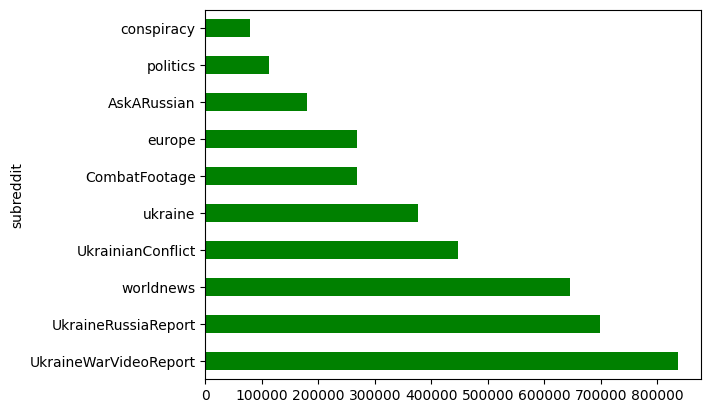

In [7]:
reddit['subreddit'].value_counts().head(10).plot(kind='barh', color='green')

In [8]:
reddit[reddit['subreddit'] == 'conspiracy'].value_counts().sum()

77630

In [9]:
reddit['comment_length'] = reddit['self_text'].str.len()
comm_avg = reddit.groupby('subreddit')['comment_length'].mean()
top_ten_sub = reddit['subreddit'].value_counts().head(10).index
top_ten_comm_avg = comm_avg[top_ten_sub]
top_ten_comm_avg

subreddit
UkraineWarVideoReport    145.482733
UkraineRussiaReport      207.991303
worldnews                193.934433
UkrainianConflict        211.301203
ukraine                  173.714853
CombatFootage            143.433440
europe                   221.500861
AskARussian              227.981569
politics                 181.809185
conspiracy               215.546474
Name: comment_length, dtype: float64

In [10]:
reddit['word_count'] = reddit['self_text'].str.split().str.len()
reddit[['self_text','comment_length','word_count']].head()

,self_text,comment_length,word_count
0,I guess the one small benefit is that the Russ...,288.0,51.0
1,It's surprising that Ukraine manages to create...,87.0,13.0
2,All costs would apply only until an enemy reac...,102.0,19.0
3,"""We are fine. I have my squirrel.""",34.0,7.0
4,Zelensky has no regard for the actual\nUkrania...,326.0,54.0


In [11]:
comm_one = reddit['self_text'][0]

In [12]:
comm_one = str(comm_one).lower()

In [13]:
comm_one

"i guess the one small benefit is that the russian economy has been battered, any surviving military going home will change attitudes, and putin's old - he's already older than the national mortality rate age. i'm hoping that it's a perfect storm and signals the end of this type of russia"

In [14]:
import string
import re
comm_one = re.sub('[%s]'%re.escape(string.punctuation),'',comm_one)

In [15]:
comm_one

'i guess the one small benefit is that the russian economy has been battered any surviving military going home will change attitudes and putins old  hes already older than the national mortality rate age im hoping that its a perfect storm and signals the end of this type of russia'

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
comm_one = [word for word in comm_one.split(' ') if word not in stopword]

In [18]:
comm_one = ' '.join(comm_one)
comm_one

'guess one small benefit russian economy battered surviving military going home change attitudes putins old  hes already older national mortality rate age im hoping perfect storm signals end type russia'

In [19]:
stemmer = nltk.SnowballStemmer('english')

In [20]:
comm_one = [stemmer.stem(word) for word in comm_one.split(' ')]

In [21]:
comm_one

['guess',
 'one',
 'small',
 'benefit',
 'russian',
 'economi',
 'batter',
 'surviv',
 'militari',
 'go',
 'home',
 'chang',
 'attitud',
 'putin',
 'old',
 '',
 'hes',
 'alreadi',
 'older',
 'nation',
 'mortal',
 'rate',
 'age',
 'im',
 'hope',
 'perfect',
 'storm',
 'signal',
 'end',
 'type',
 'russia']

In [22]:
comm_one = ' '.join(comm_one)
comm_one

'guess one small benefit russian economi batter surviv militari go home chang attitud putin old  hes alreadi older nation mortal rate age im hope perfect storm signal end type russia'

In [23]:
from nltk.stem import SnowballStemmer
stopword_set = set(stopwords.words('english'))
punctuation_regex = re.compile(f"[{re.escape(string.punctuation)}]")
stemmer = SnowballStemmer("english")

def clean_vectorized(df):
    df['self_text']=df['self_text'].fillna('')
    # Lowercase
    df["cleaned_comments"] = df["self_text"].str.lower()
    # Remove punctuation
    df["cleaned_comments"] = df["cleaned_comments"].str.replace(punctuation_regex, "", regex=True)
    # Tokenize, filter stopwords, and rejoin
    df["cleaned_comments"] = df["cleaned_comments"].str.split().apply(
        lambda words: " ".join([stemmer.stem(word) for word in words if word not in stopword_set])
    )
    return df

# Apply vectorized processing
reddit = clean_vectorized(reddit)

In [24]:
reddit['cleaned_comments'].head()

0    guess one small benefit russian economi batter...
1    surpris ukrain manag creat even small scale pr...
2    cost would appli enemi reach west yeah eastern...
3                                        fine squirrel
4    zelenski regard actual ukranian peopl europ fi...
Name: cleaned_comments, dtype: object

In [25]:
from textblob import TextBlob

In [26]:
clean_text = reddit['cleaned_comments'][4]

In [27]:
analyze= TextBlob(clean_text)

In [28]:
analyze.sentiment.polarity #not very positive

0.07500000000000001

In [29]:
def sent_analysis(clean_text):
    analyze = TextBlob(clean_text)
    polarity = analyze.sentiment.polarity

    return np.sign(polarity)

In [30]:
reddit['sentiment_score'] = reddit['cleaned_comments'].apply(sent_analysis)

In [31]:
reddit['sentiment_score'].head()

0    1.0
1   -1.0
2    0.0
3    1.0
4    1.0
Name: sentiment_score, dtype: float64

In [32]:
reddit.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_total_karma,post_score,post_title,post_upvote_ratio,post_thumbs_ups,post_created_time,comment_length,word_count,cleaned_comments,sentiment_score
0,m7fw26i,1,I guess the one small benefit is that the Russ...,europe,2025-01-16 12:40:38,1i2lt16,Secret-Sky5031,0,1,0,...,117.0,896,Zelenskyy: Europe has no chance against Russia...,0.88,896,2025-01-16 10:13:16,288.0,51.0,guess one small benefit russian economi batter...,1.0
1,m7fw20g,1,It's surprising that Ukraine manages to create...,LoveForUkraine,2025-01-16 12:40:36,1i22tmu,megsplairy,0,1,0,...,1443.0,38,Why Ukraine’s long-delayed missile production ...,0.97,38,2025-01-15 17:34:13,87.0,13.0,surpris ukrain manag creat even small scale pr...,-1.0
2,m7fw1vn,1,All costs would apply only until an enemy reac...,europe,2025-01-16 12:40:35,1i2lt16,Chrol18,0,1,0,...,102954.0,896,Zelenskyy: Europe has no chance against Russia...,0.88,896,2025-01-16 10:13:16,102.0,19.0,cost would appli enemi reach west yeah eastern...,0.0
3,m7fw179,1,"""We are fine. I have my squirrel.""",UkraineWarVideoReport,2025-01-16 12:40:26,1i2l0g0,doinbluin,0,1,0,...,4226.0,611,Russian soldier shows living conditions in an ...,0.99,611,2025-01-16 09:12:30,34.0,7.0,fine squirrel,1.0
4,m7fw073,1,Zelensky has no regard for the actual\nUkrania...,europe,2025-01-16 12:40:14,1i2lt16,Eche24,0,1,0,...,464.0,896,Zelenskyy: Europe has no chance against Russia...,0.88,896,2025-01-16 10:13:16,326.0,54.0,zelenski regard actual ukranian peopl europ fi...,1.0


In [33]:
sentiment_dist = reddit['sentiment_score'].value_counts()

In [34]:
sentiment_dist #graph, then do graph of sentiment over time by subreddit

sentiment_score
 0.0    1865860
 1.0    1605092
-1.0     984464
Name: count, dtype: int64

Text(0, 0.5, '# of Reddit Comments (Millions)')

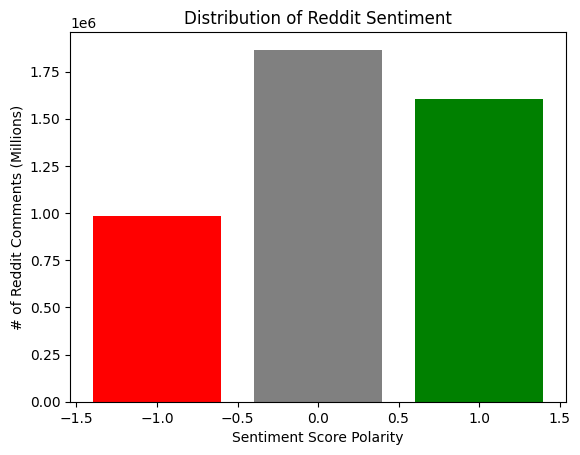

In [35]:
colors = ['grey', 'green', 'red']
plt.bar(sentiment_dist.index, sentiment_dist.values, color=colors[:len(sentiment_dist)])
plt.title('Distribution of Reddit Sentiment')
plt.xlabel('Sentiment Score Polarity')
plt.ylabel('# of Reddit Comments (Millions)')

In [36]:
#grouping each sentiment group
positive = reddit[reddit['sentiment_score'] == 1]
neutral = reddit[reddit['sentiment_score'] == 0]
negative = reddit[reddit['sentiment_score'] == -1]


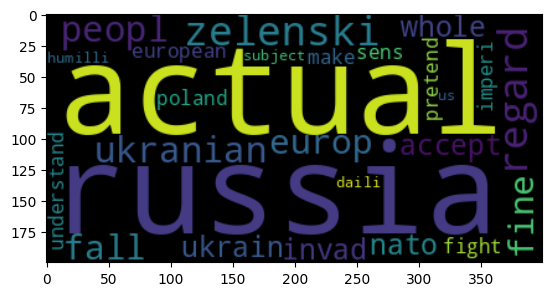

In [37]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=100, max_words=50).generate(clean_text)
plt.imshow(wordcloud, interpolation = 'bilinear')

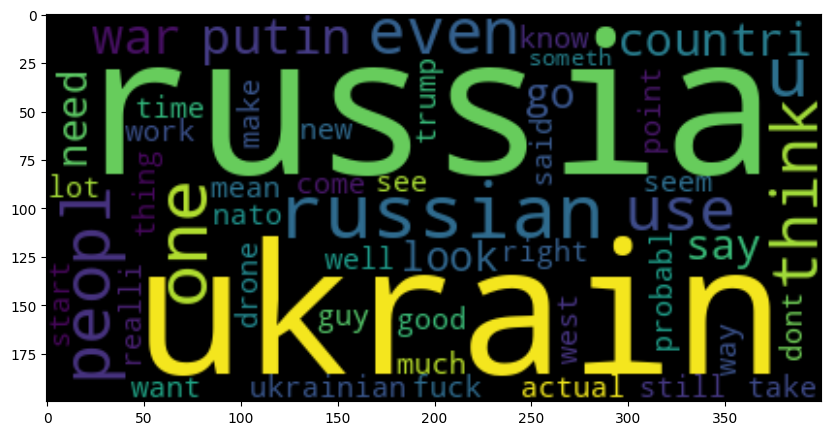

In [38]:
sample_size = 100000  # Adjust based on memory constraints
clean_text_sample = " ".join(reddit['cleaned_comments'].sample(sample_size, random_state=42).astype(str))

wordclouds = WordCloud(max_font_size=100, max_words=50).generate(clean_text_sample)
plt.figure(figsize=(10, 6))
plt.imshow(wordclouds, interpolation='bilinear')

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [40]:
x = reddit['cleaned_comments']
y = reddit['sentiment_score']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
#TF-IDF Transformer
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf = tfidf.transform(x_test)

In [43]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf, y_train) 

LogisticRegression(max_iter=1000)

In [44]:
#evaluating performance
pred = log.predict(X_test_tfidf)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.9853089046599423
              precision    recall  f1-score   support

        -1.0       0.98      0.97      0.98    197311
         0.0       0.99      0.99      0.99    373024
         1.0       0.98      0.99      0.98    320749

    accuracy                           0.99    891084
   macro avg       0.98      0.98      0.98    891084
weighted avg       0.99      0.99      0.99    891084



In [45]:
reddit['model_prediction_score'] = log.predict(tfidf.transform(reddit['cleaned_comments']))

In [46]:
day = '2025-01-10'
reddit['created_time'] = pd.to_datetime(reddit['created_time'])
filtered = reddit[reddit['created_time'].dt.date == pd.to_datetime(day).date()]
filtered[['cleaned_comments','sentiment_score','model_prediction_score']].head()

,cleaned_comments,sentiment_score,model_prediction_score
69659,probabl tank somewhat refurbish still move bat...,-1.0,-1.0
69660,trump prove taken pant putin sever time that e...,0.0,0.0
69661,your good betray alli eh dont stand wont stand...,1.0,1.0
69662,yes putin creat catastroph tragedi countri,0.0,0.0
69663,dont ask peopl live nafobot,1.0,1.0


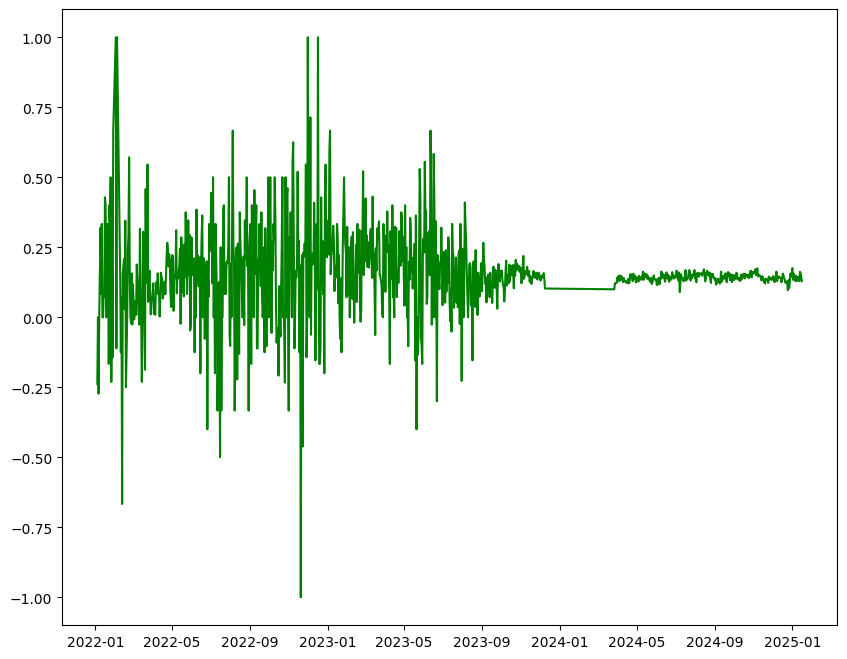

In [47]:
reddit_filtered = reddit[reddit['created_time'].dt.year >= 2022]

avg_sentiment = reddit_filtered.groupby(reddit_filtered['created_time'].dt.date)['model_prediction_score'].mean()

plt.figure(figsize=(10,8))
plt.plot(avg_sentiment.index, avg_sentiment.values, color='green')

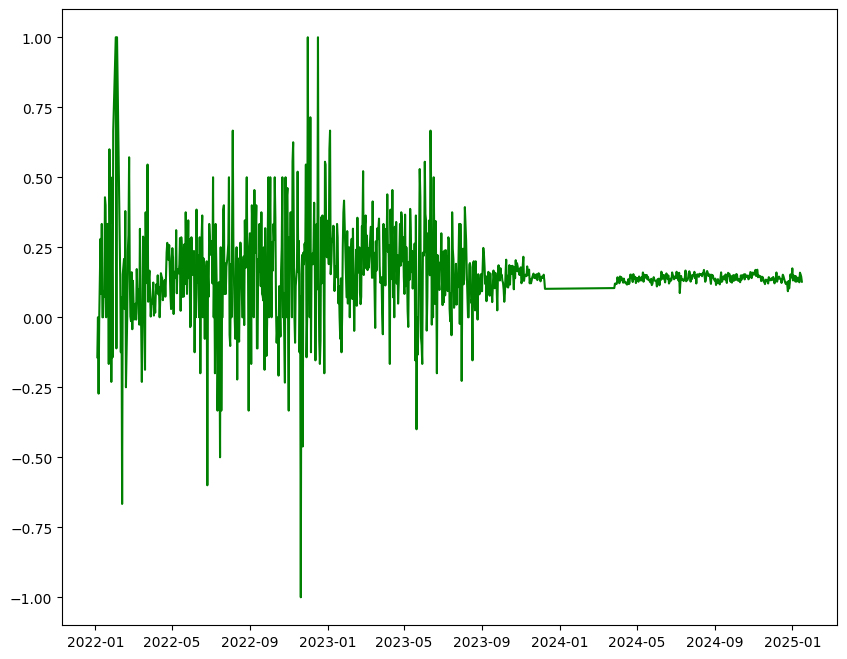

In [48]:
reddit_filtered = reddit[reddit['created_time'].dt.year >= 2022]

avg_sentiment = reddit_filtered.groupby(reddit_filtered['created_time'].dt.date)['sentiment_score'].mean()

plt.figure(figsize=(10,8))
plt.plot(avg_sentiment.index, avg_sentiment.values, color='green')